In [4]:
import pandas as pd


In [6]:
df = pd.read_json("/Users/city/Downloads/MOCK_DATA (4).json")

In [7]:
print(df.head())

   accident_id       date      time                 location  \
0            1 2018-08-16   8:50 AM    6183 Fieldstone Drive   
1            2 2020-10-27  10:36 PM       641 Delaware Drive   
2            3 2012-01-27   7:57 AM      88185 Merchant Park   
3            4 2014-04-10   5:09 AM                     None   
4            5 2012-08-19   1:24 PM  47916 Prairie Rose Lane   

  weather_condition road_condition vehicle_type  driver_age driver_gender  \
0             snowy            wet          SUV        89.0          Male   
1             sunny            wet        sedan        51.0          Male   
2             rainy            icy        truck        26.0        Female   
3             sunny            wet        truck        34.0          Male   
4             sunny            wet          SUV        60.0          Male   

   injuries  
0         6  
1         1  
2         5  
3         9  
4         9  


In [9]:
missing_values_sum = df.isna().sum()
print(missing_values_sum)

accident_id          0
date                 0
time                 0
location             8
weather_condition    8
road_condition       8
vehicle_type         8
driver_age           6
driver_gender        0
injuries             0
dtype: int64


In [ ]:
cleaned_df = df.dropna()

In [11]:
weather_counts = df['weather_condition'].value_counts()
print(weather_counts)

weather_condition
snowy    53
sunny    46
rainy    43
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt

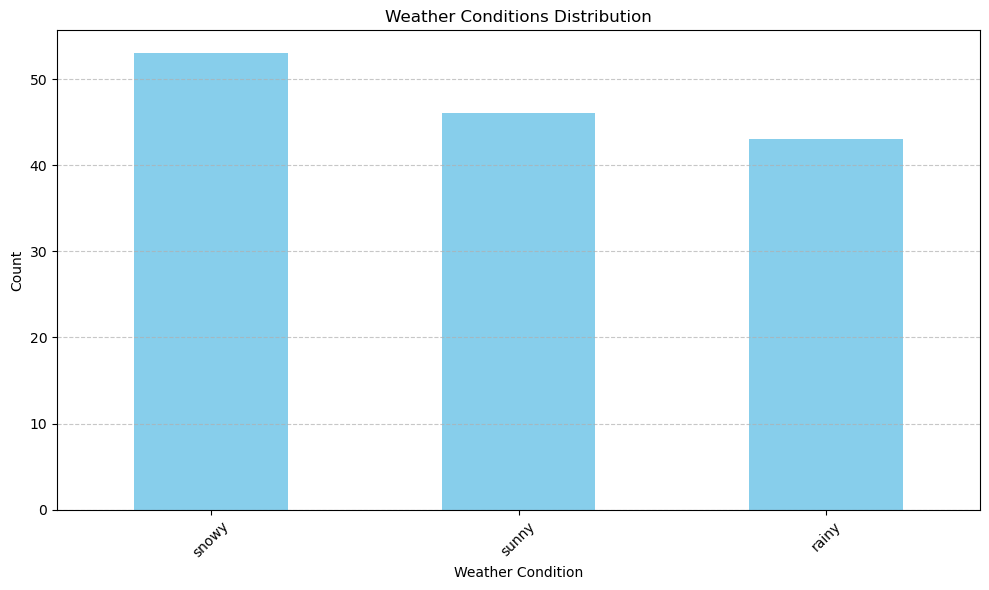

In [13]:
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Weather Conditions Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
vehicle_counts = df['vehicle_type'].value_counts()

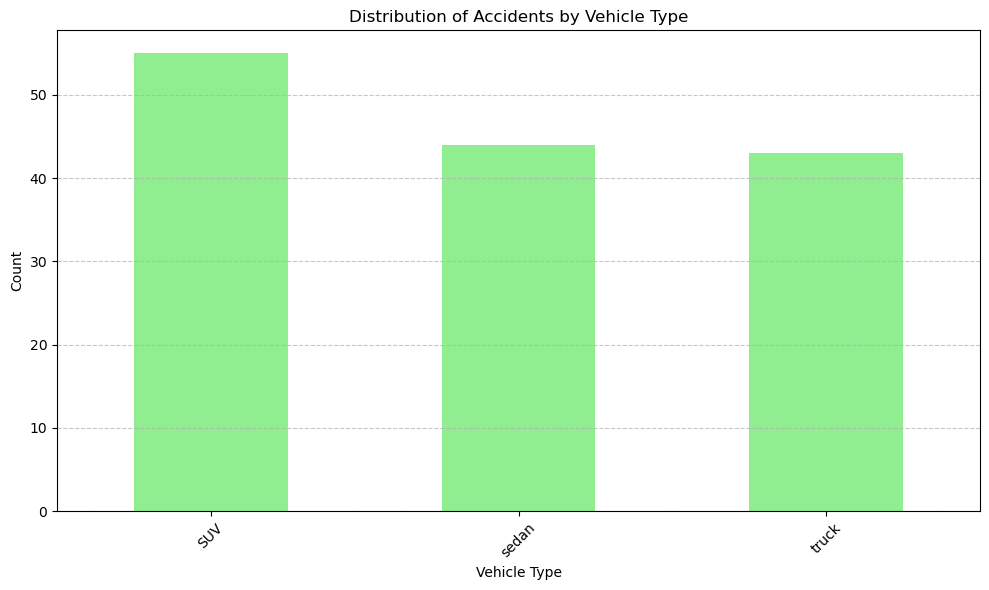

In [15]:
plt.figure(figsize=(10, 6))
vehicle_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
age_bins = [0, 20, 40, 60, 80, 100]
bin_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

In [17]:
df['age_group'] = pd.cut(df['driver_age'], bins=age_bins, labels=bin_labels, right=False)

In [18]:
age_group_counts = df['age_group'].value_counts().sort_index()

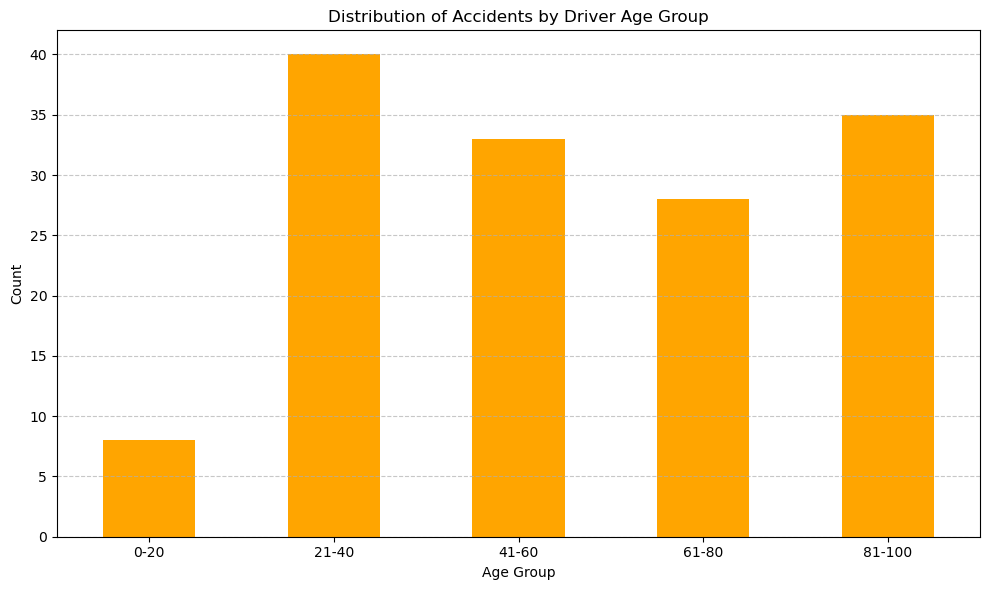

In [19]:
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Accidents by Driver Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
import seaborn as sns

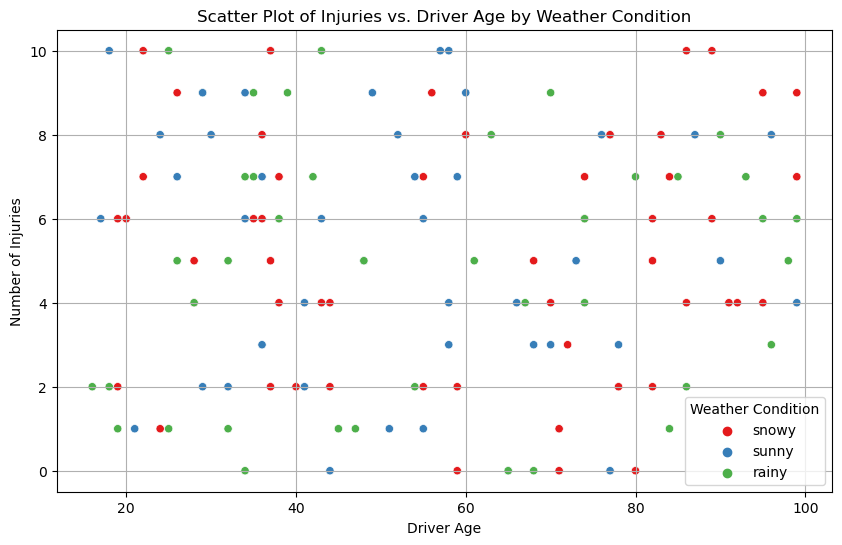

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='driver_age', y='injuries', hue='weather_condition', palette='Set1')
plt.title('Scatter Plot of Injuries vs. Driver Age by Weather Condition')
plt.xlabel('Driver Age')
plt.ylabel('Number of Injuries')
plt.legend(title='Weather Condition')
plt.grid(True)
plt.show()